In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# for i in plt.rcParams.keys():
#     if "size" in i:
#         print i
plt.rcParams.update({'figure.figsize':(9,7), 'font.size':14})


(0.01, 1000000.0)

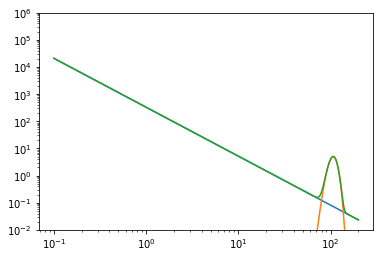

In [2]:
plt.figure()
r = np.logspace(np.log10(0.1), np.log10(200), 500)
r0 = 25
gamma = 1.8
powlaw = (r/r0)**-gamma
plt.loglog(r, powlaw)

amp = 5
width = 10
mean = 107
bump = amp*np.exp(-(r-mean)**2/(2*width**2))
plt.loglog(r, bump)

plt.loglog(r, powlaw+bump)

plt.ylim(1e-2, 1e6)

(0, 0.8)

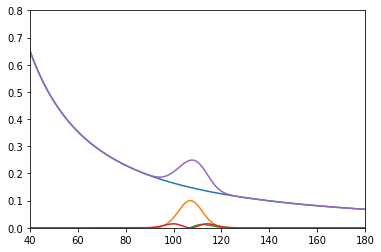

In [3]:
plt.figure()

s = np.linspace(40, 180, 500)
s0 = 30
gamma = 1.5

powlaw = (s/s0)**-gamma
plt.plot(s, powlaw)

amp = 0.1
width = 5
mean = 107
bump = amp*np.exp(-(s-mean)**2/(2*width**2))
plt.plot(s, bump)

dbumpdmu = amp*(s-mean)/width**2 * np.exp(-(s-mean)**2/(2*width**2))
plt.plot(s, dbumpdmu)

dbumpdsigma = amp*(s-mean)**2/width**3 * np.exp(-(s-mean)**2/(2*width**2))
plt.plot(s, dbumpdsigma)

plt.plot(s, powlaw+bump+dbumpdmu+dbumpdsigma)

plt.xlim(40, 180)
plt.ylim(0, 0.8)

(0, 0.8)

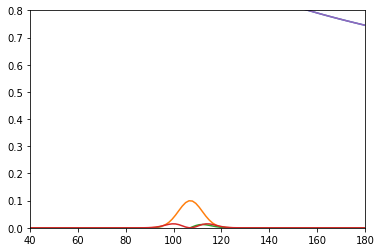

In [4]:
plt.figure()

s = np.linspace(40, 180, 100)
s0 = 100
gamma = 0.5

powlaw = (s/s0)**-gamma
powlaw = powlaw
plt.plot(s, powlaw)

amp = 0.1
width = 5
mean = 107
bump = amp*np.exp(-(s-mean)**2/(2*width**2))
plt.plot(s, bump)

dbumpdmu = amp*(s-mean)/width**2 * np.exp(-(s-mean)**2/(2*width**2))
plt.plot(s, dbumpdmu)

dbumpdsigma = amp*(s-mean)**2/width**3 * np.exp(-(s-mean)**2/(2*width**2))
plt.plot(s, dbumpdsigma)

plt.plot(s, powlaw+bump+dbumpdmu+dbumpdsigma)

plt.xlim(40, 180)
plt.ylim(0, 0.8)

In [18]:
def plot_xismu(ss, xis, labels, colors=None, xi_tocompare=None, saveto=None, figsize=None):

    color_idx = np.linspace(0, 1, len(ss))
        

    if xi_tocompare:
        compidx = list(labels).index(xi_tocompare)
        fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=figsize)
    else:
        fig = plt.figure(figsize=figsize)
        ax0 = fig.gca()

    for i in range(len(ss)):
        s = ss[i]
        xi = np.array(xis[i])
        label = labels[i]
        if colors:
            color = colors[i]
        else:
            color=plt.cm.rainbow(color_idx[i])
        if "orig" in label:
            marker = 'o'
            ls = ':'
        else:
            marker = 'None'
            ls = '-'
        
        ax0.plot(s, xi, label=label, color=color, marker=marker, ls=ls)

        #plt.xlabel(r'$s$ (Mpc/h)')
        #ax0.set_ylim(-0.005, 0.025)
        #plt.xlim(60, 210)
        ax0.set_ylabel(r'$\xi(s)$')

        ax0.legend(loc='best')

        if xi_tocompare:
            # if wp.all() != wp_tocompare.all():
            xicomp = xis[compidx]

            if len(xi)==len(xicomp):
                #ax1.semilogx(rp, (np.log10(wprp)-np.log10(wpcomp)) / np.log10(wpcomp), color=colors[label])
                ax1.plot(s, xi/xicomp, color=color)
                ax1.set_ylabel(r'$\xi$/$\xi_{{\mathrm{{{0}}}}}$'.format(xi_tocompare))
                
    return fig, (ax0, ax1)

In [6]:
color_dict = {'corrfunc orig':'b', 'corrfunc tophat':'r', 'corrfunc piecewise':'c'}

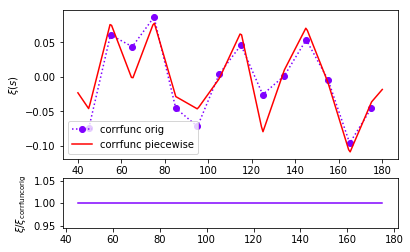

In [7]:
fn = '../results/bao/xis_dr7_FullLRG_frac0.01_piecewise.npy'
ss, xis, labels, counts, aa = np.load(fn)
plot_xismu(ss, xis, labels, xi_tocompare='corrfunc orig')

corrfunc orig
corrfunc projected
corrfunc orig
corrfunc projected


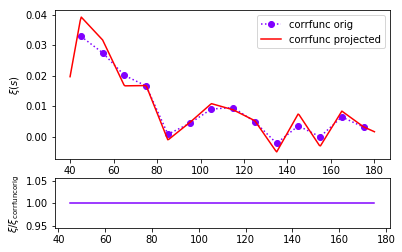

In [8]:
tags = ['_s200', '_piecewise']
sall = []
xiall = []
labelall = []
for tag in tags:
    fn = '../results/bao/xis_dr7_FullLRG_frac0.1{}.npy'.format(tag)
    ss, xis, labels, counts, aa = np.load(fn)
    for i in range(len(ss)):
        print labels[i]
        if labels[i] not in labelall:
            sall.append(ss[i])
            xiall.append(xis[i])
            labelall.append(labels[i])
    
plot_xismu(ss, xis, labels, xi_tocompare='corrfunc orig')

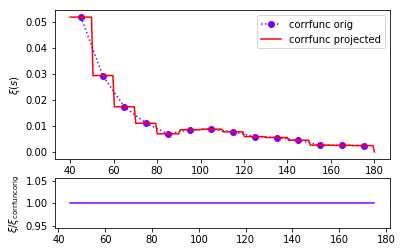

In [9]:
fn = '../results/bao/xis_dr7_FullLRG_frac1_s200.npy'
ss, xis, labels, counts, aa = np.load(fn)
plot_xismu(ss, xis, labels, xi_tocompare='corrfunc orig')

In [10]:
def piece(x, peak, width):
    p = np.array(1 - (1. / width) * abs(x - peak))
    p[(x<peak-width)^(x>peak+width)] = 0
    return p

def piecewise(rp, logbins_avg, logwidth):
    logrp = np.log10(rp)
    u = np.array([piece(logrp, peak, logwidth) for peak in logbins_avg])
    return u

def tophat(x, bins, width):

    ins = -1
    for nn in range(len(bins)-1):
        if bins[nn] <= x and x < bins[nn+1]:
            ins = nn
            break
    u = np.zeros(len(bins)-1)
    if ins>=0 and ins<len(bins)-1:
        u[ins] = 1
    return u

def top(x, peak, width):
    if (x>peak-width/2.)&(x<peak+width/2.):
        return 1
    return 0


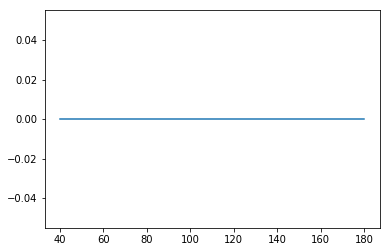

In [11]:
K = 14
sbins = np.linspace(40., 180., K+1)
sbinsavg = 0.5*(sbins[1:] + sbins[:-1])
width = sbins[1] - sbins[0]

plt.figure()
svals = np.linspace(40., 180, 10)
us = []
for s in svals:
    for sbin in [sbinsavg[0]]:
        u = top(s, sbin, width)
        us.append(u)
plt.plot(svals, us)

corrfunc orig
add corrfunc orig
corrfunc tophat
add corrfunc tophat
corrfunc orig
corrfunc projected
add corrfunc piecewise


/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in divide
/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in divide


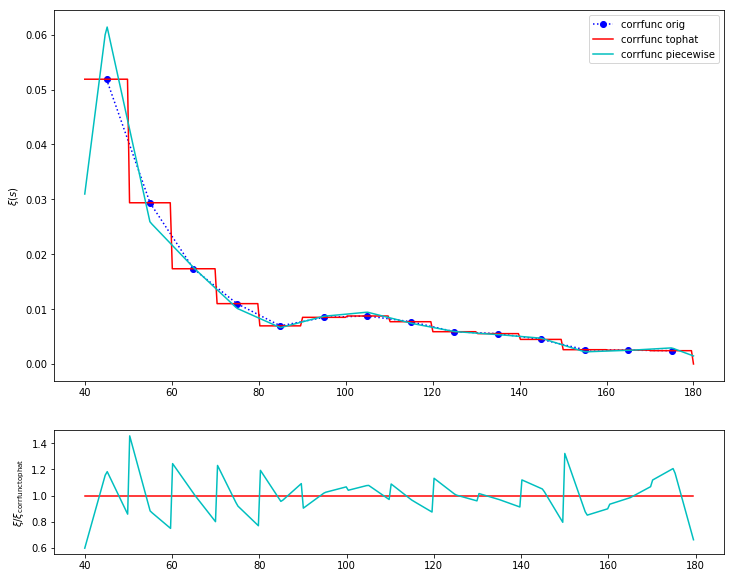

In [12]:
tags = ['_tophat', '_piecewise']
sall = []
xiall = []
labelall = []
colorall= []
for tag in tags:
    fn = '../results/bao/xis_dr7_FullLRG_frac1{}.npy'.format(tag)
    ss, xis, labels, counts, aa = np.load(fn)
    for i in range(len(ss)):
        print labels[i]
        if "projected" in labels[i]:
            if "piecewise" in tag:
                labels[i] = "corrfunc piecewise"
            else:
                labels[i] = "corrfunc tophat"
        if labels[i] not in labelall:
            print "add",labels[i]
            sall.append(ss[i])
            xiall.append(xis[i])
            labelall.append(labels[i])
            colorall.append(color_dict[labels[i]])

plot_xismu(sall, xiall, labelall, colors=colorall, xi_tocompare='corrfunc tophat', figsize=(12,10))

corrfunc orig
add corrfunc orig
corrfunc tophat
add corrfunc tophat
corrfunc orig
corrfunc projected
add corrfunc piecewise


/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in divide
/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in divide


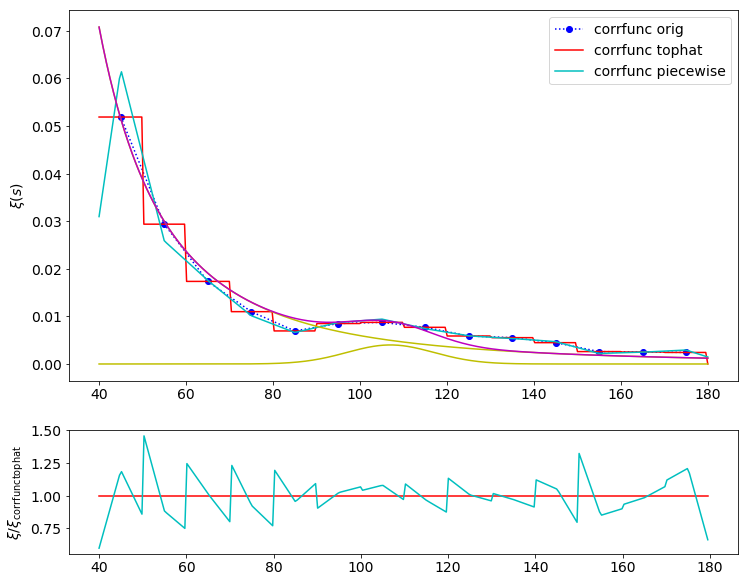

In [93]:
tags = ['_tophat', '_piecewise']
sall = []
xiall = []
labelall = []
colorall= []
for tag in tags:
    fn = '../results/bao/xis_dr7_FullLRG_frac1{}.npy'.format(tag)
    ss, xis, labels, counts, aa = np.load(fn)
    for i in range(len(ss)):
        print labels[i]
        if "projected" in labels[i]:
            if "piecewise" in tag:
                labels[i] = "corrfunc piecewise"
            else:
                labels[i] = "corrfunc tophat"
        if labels[i] not in labelall:
            print "add",labels[i]
            sall.append(ss[i])
            xiall.append(xis[i])
            labelall.append(labels[i])
            colorall.append(color_dict[labels[i]])

fig, ax = plot_xismu(sall, xiall, labelall, colors=colorall, xi_tocompare='corrfunc tophat', figsize=(12,10))


s = np.linspace(40, 180, 500)
s0 = 15
gamma = 2.7

powlaw = (s/s0)**-gamma
ax[0].plot(s, powlaw, 'y-')

amp = 0.004
width = 10
mean = 107
bump = amp*np.exp(-(s-mean)**2/(2*width**2))
ax[0].plot(s, bump, 'y-')

ax[0].plot(s, powlaw+bump, 'm-')

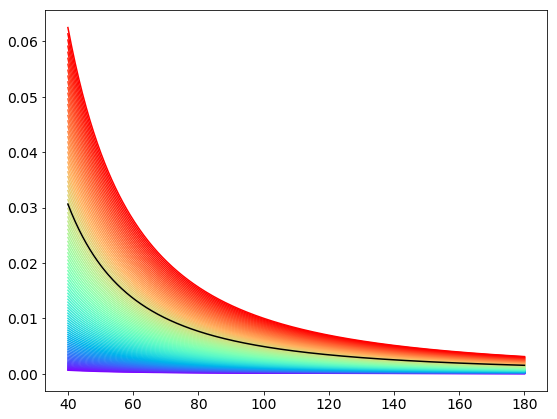

In [66]:
s0s = np.linspace(1, 10, 100)
s = np.linspace(40, 180, 500)

color_idx = np.linspace(0, 1, len(s0s))

for i in range(len(s0s)):
    s0 = s0s[i]
    color=plt.cm.rainbow(color_idx[i])
    gamma = 2

    powlaw = (s/s0)**-gamma
    plt.plot(s, powlaw, color=color)
    
gamma = 2
s0 = 

powlaw = (s/s0)**-gamma
plt.plot(s, powlaw, 'k')

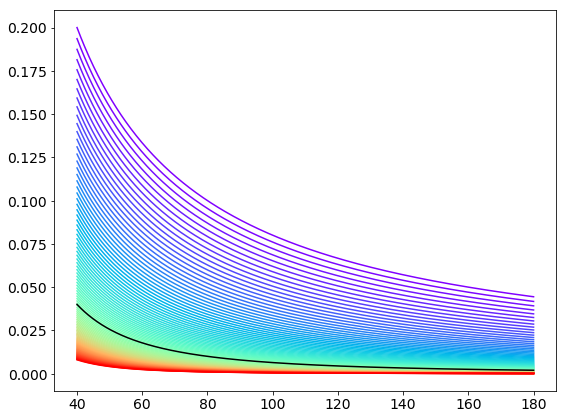

In [62]:
gammas = np.linspace(1, 3, 100)
s = np.linspace(40, 180, 500)

color_idx = np.linspace(0, 1, len(s0s))

for i in range(len(gammas)):
    gamma = gammas[i]
    s0 = 8
    color=plt.cm.rainbow(color_idx[i])

    powlaw = (s/s0)**-gamma
    plt.plot(s, powlaw, color=color)
    
gamma = 2
s0 = 8

powlaw = (s/s0)**-gamma
plt.plot(s, powlaw, 'k')

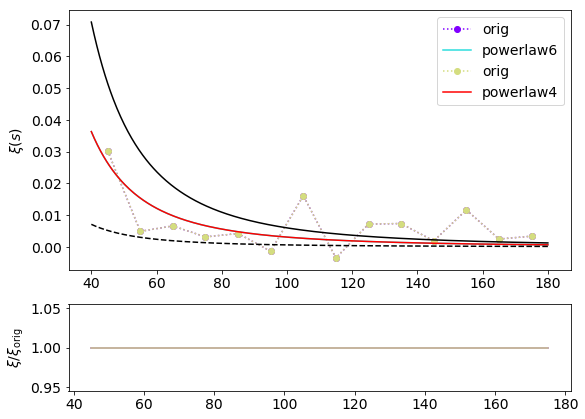

In [99]:
tags = ['_powerlaw6', '_powerlaw4']
ssall = []
xisall = []
labelsall = []
for tag in tags:
    fn = '../results/bao/xis_dr7_FullLRG_frac0.1{}.npy'.format(tag)
    ss, xis, labels, counts, aa = np.load(fn)
    ssall += list(ss)
    xisall += list(xis)
    labelsall += list(labels)
    
fig, ax = plot_xismu(ssall, xisall, labelsall, xi_tocompare='orig')

gamma = 2.7
s0 = 15.0

powlaw = (s/s0)**-gamma
ax[0].plot(s, powlaw, 'k')

#powlawcomp = 10*(s/s0)**-gamma
#ax[0].plot(s, powlawcomp, 'k--')

powlawcompsmall = 0.1*(s/s0)**-gamma
ax[0].plot(s, powlawcompsmall, 'k--')

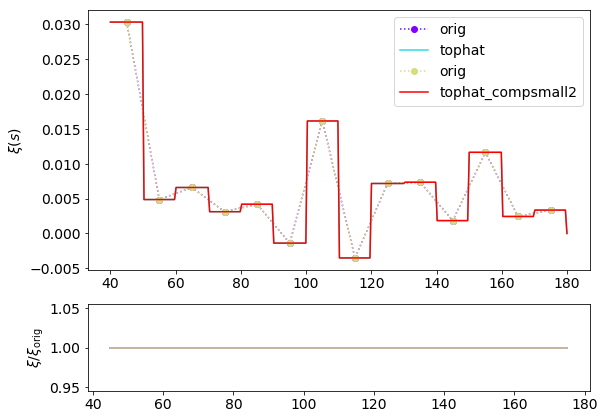

In [91]:
tags = ['_tophat', '_tophat_compsmall2']
ssall = []
xisall = []
labelsall = []
for tag in tags:
    fn = '../results/bao/xis_dr7_FullLRG_frac0.1{}.npy'.format(tag)
    ss, xis, labels, counts, aa = np.load(fn)
    ssall += list(ss)
    xisall += list(xis)
    labelsall += list(labels)
    
fig, ax = plot_xismu(ssall, xisall, labelsall, xi_tocompare='orig')